# Hands On with Simple Linear Regression
## Goal for practice
### 1. Perform simple linear regression with SKlearn
### 2. Use model performance metrics to evaluate model performance
### 3. Perform residule diagnostic and decide proper preprocessing before fitting the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

In [6]:
! pip install scikit-learn

#### Load important library

In [7]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [8]:
# path="your/data/path" # this path need to change to fit your file direcotry
path = ""
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
#print(os.path.join(path, data1b))

# Read Data

In [9]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))
dt2b = pd.read_csv(os.path.join(path, data2b))
dt2t = pd.read_csv(os.path.join(path, data2t))
dt3b = pd.read_csv(os.path.join(path, data3b))
dt3t = pd.read_csv(os.path.join(path, data3t))

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and draw scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [78]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [7]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [8]:
dt1t.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [9]:
dt1b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [10]:
dt1t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [201]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    0
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data has a missing value in target , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [202]:
dt1b = dt1b.dropna().copy()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


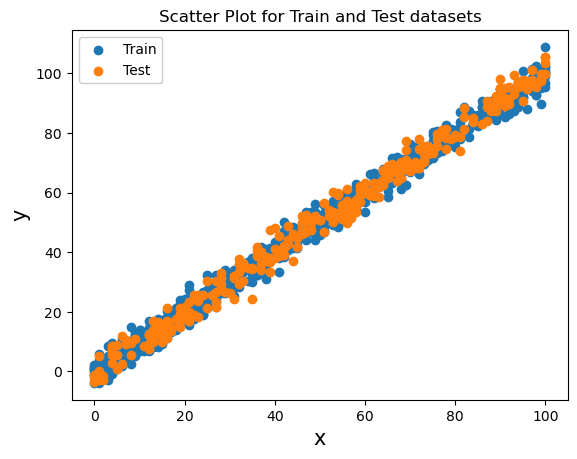

In [203]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [204]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [158]:
# fit model
reg = LinearRegression(normalize=True)
reg.fit(x_train, y_train)

# predict
y_pred = reg.predict(x_test)
print('predicted R^2 :', r2_score(y_test, y_pred))
print('predicted MSE :', mean_squared_error(y_test,y_pred))
y_test.shape

predicted R^2 : 0.9888014444327563
predicted MSE : 9.43292219203931


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(300,)

In [81]:
print("intercept: {}".format(reg.intercept_))
print("coeffcient: {}".format(reg.coef_))

intercept: -1743.2412867403095
coeffcient: [101.63824122]


Hence the fitted line : `y = -0.10726546430095851 + 1.00065638*x`

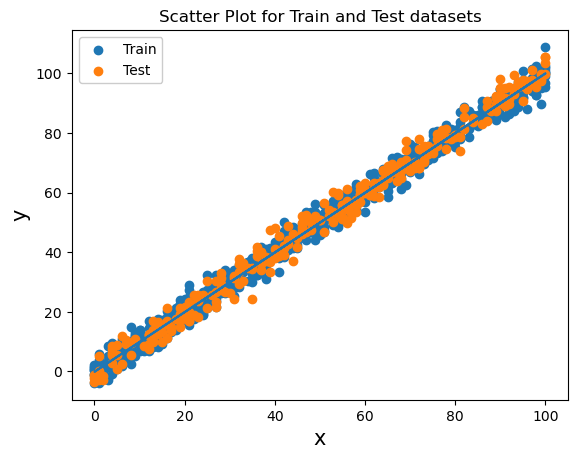

In [19]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (reg.intercept_ + reg.coef_[0] * dt1b['x']))

How about build sample residual?

In [20]:
y_pred_b = reg.predict(x_train)
residuals = y_train - y_pred_b

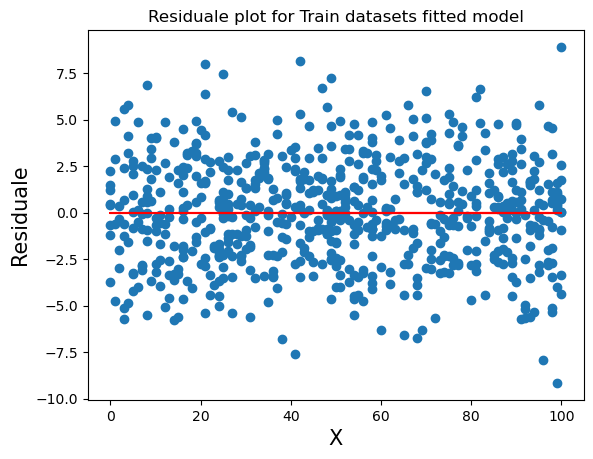

In [21]:
plt.scatter((dt1b['x']),residuals)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0 * dt1b['x'], color="r") # why this line?

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

Below code give a initial scripts to look into data, 
please take sometime following majority steps of practice 1 to tackle this problem 

In [22]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [23]:
dt2b.head()

,x,y
0,576.0,21.549452
1,2500.0,47.464463
2,225.0,17.218656
3,1444.0,36.586398
4,7569.0,87.288984


In [24]:
dt2t.head()

,x,y
0,5929,79.775152
1,441,23.177279
2,484,25.609262
3,400,17.857388
4,1296,41.849864


In [25]:
dt2b.describe()

,x,y
count,7.000000e+02,699.000000
mean,2.113670e+04,49.939869
std,4.709034e+05,29.109217
min,0.000000e+00,-3.839981
25%,6.250000e+02,24.929968
50%,2.401000e+03,48.973020
75%,5.625000e+03,74.929911
max,1.246201e+07,108.871618


In [26]:
dt2t.describe()

,x,y
count,300.000000,300.000000
mean,3404.330000,51.205051
std,2996.644856,29.071481
min,0.000000,-3.467884
25%,729.000000,25.676502
50%,2809.000000,52.170557
75%,5329.000000,74.303007
max,10000.000000,105.591837


In [27]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [10]:
dt2b = dt2b.dropna().copy()
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [11]:
x_train = dt2b['x']
y_train = dt2b['y']
x_test = dt2t['x']
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [13]:
# fit model
reg = LinearRegression(normalize=True)
reg.fit(x_train, y_train)

# predict
y_pred = reg.predict(x_test)
print('predicted R^2 :', r2_score(y_test, y_pred))
print('predicted MSE :', mean_squared_error(y_test,y_pred))
print("intercept: {}".format(reg.intercept_))
print("coeffcient: {}".format(reg.coef_))

predicted R^2 : 0.925513710705817
predicted MSE : 62.742321281234254
intercept: 19.2939356416098
coeffcient: [0.00917928]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


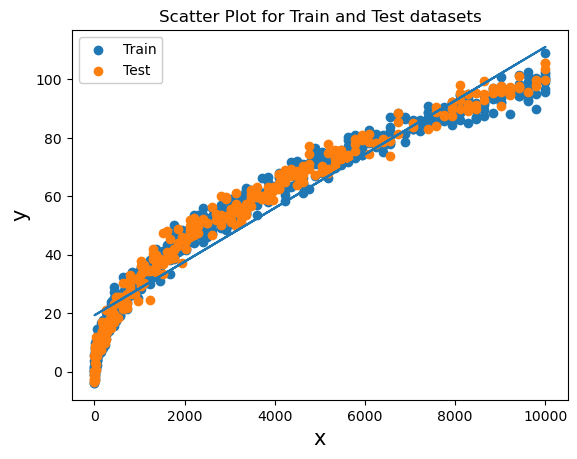

In [15]:
plt.scatter(dt2b['x'],dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt2b['x'], (reg.intercept_ + reg.coef_[0] * dt2b['x']))

The trend I observed is that，the scatter plot shows x and y follows a non-linear relationship. Thus, I think do a log transformation improve the model fit. 

# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [82]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [83]:
dt3b.head()

,x,y
0,24.0,464.378880
1,50.0,2252.875253
2,15.0,296.482126
3,38.0,1338.564521
4,87.0,7619.366709


In [84]:
dt3t.head()

,x,y
0,77,6364.074878
1,21,537.186256
2,22,655.834278
3,20,318.886311
4,36,1751.411149


In [85]:
dt3b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,3340.124826
std,134.681703,3055.712556
min,0.000000,0.014850
25%,25.000000,621.515765
50%,49.000000,2398.356724
75%,75.000000,5614.501316
max,3530.157369,11853.029271


In [86]:
dt3t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,3464.291087
std,28.504286,3082.356336
min,0.000000,0.075794
25%,27.000000,659.283348
50%,53.000000,2721.780348
75%,73.000000,5520.944197
max,100.000000,11149.636147


In [16]:
print("Train data misscnt: {}".format(dt3b.isnull().sum()))
print("Test data misscnt: {}".format(dt3t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [17]:
dt3b = dt3b.dropna().copy()
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3b.shape))

Train data size: (699, 2)
Test data size: (699, 2)


In [106]:
x_train = dt3b['x']
y_train = dt3b['y']
x_test = dt3t['x']
y_test = dt3t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)



array([[6.36407488e+03],
       [5.37186256e+02],
       [6.55834278e+02],
       [3.18886311e+02],
       [1.75141115e+03],
       [9.61426310e+01],
       [3.46622551e+03],
       [9.52926163e+03],
       [3.38380715e+02],
       [7.65055945e+01],
       [7.90405895e+00],
       [2.92251758e+02],
       [9.05334586e+03],
       [3.76848736e+03],
       [1.61982239e+03],
       [2.19706088e+02],
       [4.48338296e+03],
       [2.76725881e+02],
       [8.21835393e+03],
       [5.96444608e+03],
       [8.48592173e+03],
       [2.20091186e+03],
       [8.06877215e+03],
       [4.71489261e+02],
       [9.48911134e+03],
       [3.25086002e+03],
       [6.13254466e+03],
       [3.66014663e+02],
       [8.65548032e+03],
       [7.07087873e+02],
       [9.51630558e+03],
       [9.88174831e+02],
       [1.23392354e+03],
       [6.17959881e+03],
       [1.09369952e+03],
       [2.67285606e+03],
       [2.87535666e+03],
       [4.82511680e+03],
       [7.52129109e+02],
       [1.32106384e+03],


In [19]:
# fit model
reg = LinearRegression(normalize=True)
reg.fit(x_train, y_train)

# predict
y_pred = reg.predict(x_test)
print('predicted R^2 :', r2_score(y_test, y_pred))
print('predicted MSE :', mean_squared_error(y_test,y_pred))
print("intercept: {}".format(reg.intercept_))
print("coeffcient: {}".format(reg.coef_))

predicted R^2 : 0.9204524642903842
predicted MSE : 753255.5700480755
intercept: -1743.2412867403095
coeffcient: [101.63824122]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


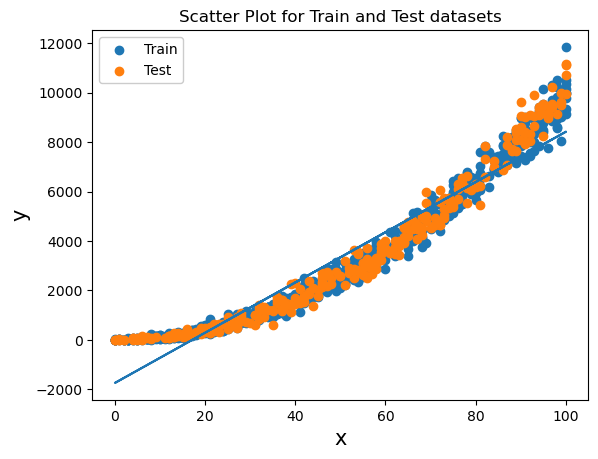

In [20]:
plt.scatter(dt3b['x'],dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt3b['x'], (reg.intercept_ + reg.coef_[0] * dt3b['x']))

The trend I observed is that，the scatter plot shows x and y follows a non-linear relationship. Thus, I think modelling as exponentials or other non-linear modelings could improve fitting. 

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - Repeat steps 1-4 for n iterations to until converge to min cost
#### 6 - End loop before n iterations if minimal is alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [205]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    #### code up your solution here ######
    derivatives=dict()
    derivatives['db0']=np.sum((predictions - y_train))
    derivatives['db1'] = np.dot(np.transpose(predictions - y_train),x_train)[0,0]
 
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    #### code up your solution here 
    parameters['b1']=parameters['b1']-learning_rate*derivatives['db1']
    parameters['b0']=parameters['b0']-learning_rate*derivatives['db0']
    
    return parameters

{'db0': -46797697.60378163, 'db1': -2885048.131484149}

### Build training function

In [221]:
def train(x_train, y_train, learning_rate, iters = 5):
    # random initialization of parameters
    parameters = dict()
    np.random.seed(10)
    parameters["b1"] = np.random.uniform(0,1) * -1
    np.random.seed(5)
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    # loss
    loss = list()
    
    # iterate
    for i in range(iters):
        
        # Prediction
        predictions=get_pred(x_train, parameters)
        # cost function
        cost=cost_function(predictions, y_train)
        
        # append loss and print
        loss.append(cost)
    
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        # plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        
        # Calc. gradient/derivatives
        derivatives= deriv(x_train, y_train, predictions)
 
        # update parameters
        parameters=update_parameters(parameters, derivatives, learning_rate)
    
    return parameters, loss

### Traing model with your function by gradient descent algrithm

Iteration = 1, Loss = 4609.39616986404
Iteration = 2, Loss = 4592.545367486208
Iteration = 3, Loss = 4575.774789149659
Iteration = 4, Loss = 4559.084028696937
Iteration = 5, Loss = 4542.472682096055
Iteration = 6, Loss = 4525.940347429184
Iteration = 7, Loss = 4509.486624881375
Iteration = 8, Loss = 4493.111116729376
Iteration = 9, Loss = 4476.813427330487
Iteration = 10, Loss = 4460.593163111479
Iteration = 11, Loss = 4444.449932557577
Iteration = 12, Loss = 4428.383346201496
Iteration = 13, Loss = 4412.393016612541
Iteration = 14, Loss = 4396.478558385766
Iteration = 15, Loss = 4380.639588131185
Iteration = 16, Loss = 4364.875724463046
Iteration = 17, Loss = 4349.186587989167
Iteration = 18, Loss = 4333.571801300319
Iteration = 19, Loss = 4318.0309889596665
Iteration = 20, Loss = 4302.563777492285
Iteration = 21, Loss = 4287.169795374701
Iteration = 22, Loss = 4271.848673024512
Iteration = 23, Loss = 4256.600042790071
Iteration = 24, Loss = 4241.423538940192
Iteration = 25, Loss = 42

{'b1': -0.549200583333703, 'b0': 3.733090210229296}

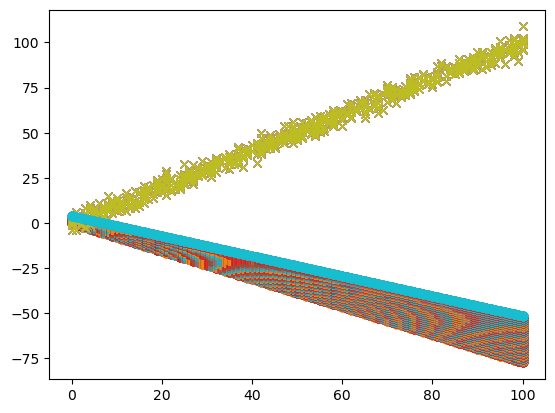

In [227]:
fitted_parameters, loss=train(x_train, y_train, 0.000000001, iters = 100)
#y = -0.10726546430095851 + 1.00065638*x
fitted_parameters

After training using gradient descent algrithm, the set of parameters I obtained is {'b1': -0.549200583333703, 'b0': 3.733090210229296}.


##### Print your final fitted model/ validate model on test data set

The fitted line : `y = 3.733090210229296-0.549200583333703*x` 

The following code is printing out performance matrics on test set. Here we can see the effects of using the gradient descent algorithm is 

In [228]:
parameters['b1']=fitted_parameters['b1']
parameters['b0']=fitted_parameters['b0']
x_test = x_test.reshape(-1,1)
y_test_predict=get_pred(x_test, parameters)
print('predicted R^2 on test set :', r2_score(y_test, y_test_predict))
print('predicted MSE on test set :', mean_squared_error(y_test,y_test_predict))
#r2_score(y_test, y_test_predict)
#y_test_predict.shape
print(cost_function(y_test_predict, y_test))

predicted R^2 on test set : -8.118669418248516
predicted MSE on test set : 7680.963727935289
3389.3714932316716


The following code is graphing predictions and true values on test set using the fitted model. 

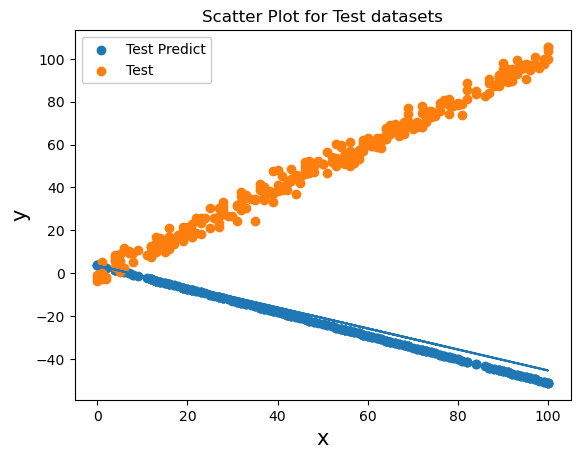

In [229]:
plt.scatter(x_test,y_test_predict, label="Test Predict")
plt.title("Scatter Plot for Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(x_test,y_test, label= "Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(x_test, (3.62217606694731+ -0.49010001042239215* x_test))

The following code is graphing predictions and true values on train set using the fitted model,  and printing out performance matrics on train set. 

predicted R^2 on train set : -7.8009043463504515
predicted MSE on train set : 7446.74698052308


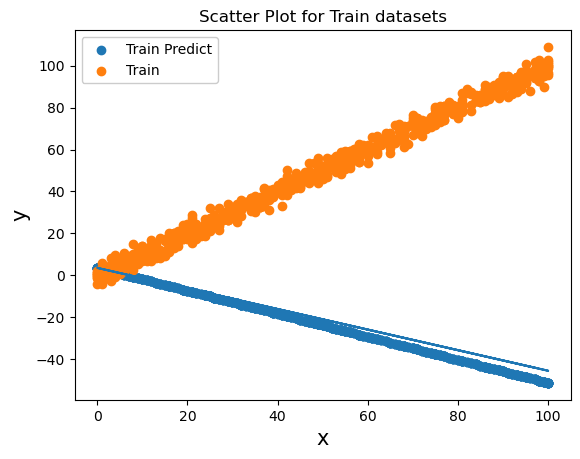

In [230]:
y_train_predict=get_pred(x_train, parameters)
plt.scatter(x_train,y_train_predict, label="Train Predict")
plt.title("Scatter Plot for Train datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(x_train,y_train, label= "Train")

plt.legend(framealpha=1, frameon=True)

plt.plot(x_train, (3.62217606694731+ -0.49010001042239215* x_train))

print('predicted R^2 on train set :', r2_score(y_train, y_train_predict))
print('predicted MSE on train set :', mean_squared_error(y_train,y_train_predict))